In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
import pandas as pd # Data manipulation and analysis
import numpy as np # Numerical operations
import matplotlib.pyplot as plt # Plotting and visualization
import seaborn as sns # Statistical data visualization
from sklearn.preprocessing import StandardScaler # Feature scaling
from sklearn.model_selection import train_test_split # Splitting data into training and testing sets
from sklearn.linear_model import LogisticRegression # Logistic Regression model
from sklearn.metrics import accuracy_score # Metric for classification accuracy
from sklearn.ensemble import RandomForestClassifier # Random Forest classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # Ensemble methods
from sklearn.feature_selection import chi2 # Chi-squared test for feature selection
from sklearn.metrics import (
    accuracy_score, # Accuracy classification score
    precision_score, # Precision metric
    recall_score, # Recall metric
    f1_score, # F1-score metric
    roc_auc_score, # ROC AUC score
    classification_report, # Text report showing the main classification metrics
    confusion_matrix # Confusion matrix to evaluate classification accuracy
)

In [54]:
#data Load
data = pd.read_csv("/content/drive/MyDrive/Telco_Customer_Churn_Dataset  (1) (1).csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [55]:
#Display concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [56]:
# Print the number of rows and columns in the DataFrame
print("Number of Rows:", data.shape[0])
print("Number of Columns:", data.shape[1])

Number of Rows: 7043
Number of Columns: 21


In [57]:
#Check for Missing Values
missing_values = data.isnull().sum()# To identify and count missing values
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [58]:
# Generate descriptive statistics for numerical columns in the DataFrame
descriptive_stats = data.describe()
print("Descriptive Statistics for Numerical Columns:")
print(descriptive_stats)

Descriptive Statistics for Numerical Columns:
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [59]:
# Print unique values for each categorical column in the DataFrame
print("Unique Values for Categorical Columns:")
for col in data.columns:
    if data[col].dtype == 'object':# Check if the column has object dtype (typically categorical)
        print(f"\nColumn '{col}':")
        print(data[col].unique())

Unique Values for Categorical Columns:

Column 'customerID':
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Column 'gender':
['Female' 'Male']

Column 'Partner':
['Yes' 'No']

Column 'Dependents':
['No' 'Yes']

Column 'PhoneService':
['No' 'Yes']

Column 'MultipleLines':
['No phone service' 'No' 'Yes']

Column 'InternetService':
['DSL' 'Fiber optic' 'No']

Column 'OnlineSecurity':
['No' 'Yes' 'No internet service']

Column 'OnlineBackup':
['Yes' 'No' 'No internet service']

Column 'DeviceProtection':
['No' 'Yes' 'No internet service']

Column 'TechSupport':
['No' 'Yes' 'No internet service']

Column 'StreamingTV':
['No' 'Yes' 'No internet service']

Column 'StreamingMovies':
['No' 'Yes' 'No internet service']

Column 'Contract':
['Month-to-month' 'One year' 'Two year']

Column 'PaperlessBilling':
['Yes' 'No']

Column 'PaymentMethod':
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Column 'TotalCharges':


In [60]:
# identify and count duplicate rows
duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [61]:
# Remove rows where 'TotalCharges' is null and verify the removal
data.dropna(subset=['TotalCharges'], inplace=True)
print(f"Number of missing values in 'TotalCharges' after removal: {data['TotalCharges'].isnull().sum()}")

Number of missing values in 'TotalCharges' after removal: 0


In [62]:
# Replace empty strings or strings containing only spaces with NaN
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)
# Drop rows where TotalCharges is now NaN (after replacing problematic strings)
data.dropna(subset=['TotalCharges'], inplace=True)
# Convert to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [63]:


# List of numerical columns to be scaled
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Instantiate StandardScaler
scaler = StandardScaler()

# Apply fit_transform to the selected numerical columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

print("Numerical features scaled successfully.")
data.head()

Numerical features scaled successfully.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,-1.280248,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,-1.161694,-0.994194,No
1,5575-GNVDE,Male,0,No,No,0.064303,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,-0.260878,-0.173740,No
2,3668-QPYBK,Male,0,No,No,-1.239504,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,-0.363923,-0.959649,Yes
3,7795-CFOCW,Male,0,No,No,0.512486,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.747850,-0.195248,No
4,9237-HQITU,Female,0,No,No,-1.239504,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,0.196178,-0.940457,Yes


In [64]:
# numerical features have been scaled
data = pd.get_dummies(data, drop_first=True)# drop_first=True avoids multicollinearity
print("One-hot encoding applied to categorical features successfully.")
data.head()

One-hot encoding applied to categorical features successfully.


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,-1.280248,-1.161694,-0.994194,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,0,0.064303,-0.260878,-0.173740,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,-1.239504,-0.363923,-0.959649,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,0.512486,-0.747850,-0.195248,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,0,-1.239504,0.196178,-0.940457,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True


In [65]:
#shape of the DataFrame.
print("Updated DataFrame Info:")
data.info()
print("\nUpdated DataFrame Shape:")
print(data.shape)

Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Columns: 7062 entries, SeniorCitizen to Churn_Yes
dtypes: bool(7058), float64(3), int64(1)
memory usage: 47.6 MB

Updated DataFrame Shape:
(7032, 7062)


In [66]:
# target variable
y = data['Churn_Yes'] # Target variable
X = data.drop('Churn_Yes', axis=1) # Features (all columns except 'Churn_Yes')
print("Features (X) and Target (y) separated.")

Features (X) and Target (y) separated.


In [67]:
# Remove customerID columns from the feature set to avoid overfitting
customer_id_cols = [col for col in X.columns if col.startswith('customerID_')]
X = X.drop(columns=customer_id_cols)
print(f"Shape of X after removing customerID columns: {X.shape}")

Shape of X after removing customerID columns: (7032, 30)


1. Data Splitting Methodologies (Step by Step)

In [68]:
# Get the total number of samples in the feature set X
num_samples = X.shape[0]
print(f"Total number of samples in X: {num_samples}")

Total number of samples in X: 7032


In [69]:
# Display the distribution and percentage distribution of the target variable 'Churn_Yes'
print("Distribution of target variable (Churn_Yes):")
print(y.value_counts())
print("\nPercentage distribution of target variable (Churn_Yes):")
print(y.value_counts(normalize=True) * 100)

Distribution of target variable (Churn_Yes):
Churn_Yes
False    5163
True     1869
Name: count, dtype: int64

Percentage distribution of target variable (Churn_Yes):
Churn_Yes
False    73.421502
True     26.578498
Name: proportion, dtype: float64


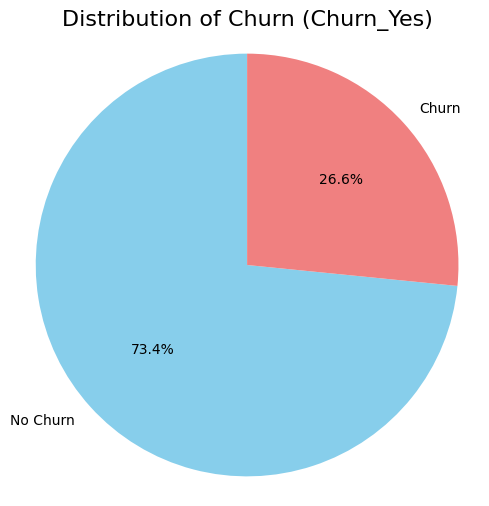

In [70]:
plt.figure(figsize=(6, 6))
plt.pie(y.value_counts(), labels=['No Churn', 'Churn'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Churn (Churn_Yes)', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [71]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Data split into training and testing sets successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets successfully.
X_train shape: (5625, 30)
X_test shape: (1407, 30)
y_train shape: (5625,)
y_test shape: (1407,)


In [72]:
# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,# 20% of data for testing
    stratify=y, # Ensure target variable distribution is maintained in splits
    random_state=42# For reproducibility
)


In [73]:
# Split the data into training, validation, and test sets
# First split: Train + Temp (70% train, 30% temp)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

# Second split: Validation + Test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42
)

# Print the shapes of the resulting datasets
print(X_train.shape, X_val.shape, X_test.shape)


(4922, 30) (1055, 30) (1055, 30)


In [74]:
# Manually split the data into training and testing sets based on an index
split_index = int(len(data) * 0.8)# 80% for training

train = data.iloc[:split_index]# Training data
test = data.iloc[split_index:] # Testing data

X_train = train.drop("Churn_Yes", axis=1) # Features for training
y_train = train["Churn_Yes"] # Target for training

X_test = test.drop("Churn_Yes", axis=1) # Features for testing
y_test = test["Churn_Yes"] # Target for testing


print("Train data:\n",X_train,y_train)
print("\n")
print("test data:\n" ,X_test,y_test)

Train data:
       SeniorCitizen    tenure  MonthlyCharges  TotalCharges  \
0                 0 -1.280248       -1.161694     -0.994194   
1                 0  0.064303       -0.260878     -0.173740   
2                 0 -1.239504       -0.363923     -0.959649   
3                 0  0.512486       -0.747850     -0.195248   
4                 0 -1.239504        0.196178     -0.940457   
...             ...       ...             ...           ...   
5629              1 -1.280248       -1.487450     -0.998518   
5630              0  0.268022        1.284803      0.754938   
5631              0 -1.198760       -1.322910     -0.972841   
5632              0  1.042158       -1.479140     -0.508160   
5633              0 -1.076528       -1.278035     -0.926163   

      customerID_0003-MKNFE  customerID_0004-TLHLJ  customerID_0011-IGKFF  \
0                     False                  False                  False   
1                     False                  False                  False   

In [75]:
# Display the first few rows of the DataFrame to quickly inspect its current state

data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,-1.280248,-1.161694,-0.994194,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,0,0.064303,-0.260878,-0.173740,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,-1.239504,-0.363923,-0.959649,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,0.512486,-0.747850,-0.195248,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,0,-1.239504,0.196178,-0.940457,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True


In [76]:
# Define a list of selected domain-specific features
domain_features = [
    "tenure",
    "MonthlyCharges",
    "Contract_One year",
    "Contract_Two year",
    "PaymentMethod_Credit card (automatic)",
    "PaymentMethod_Electronic check",
    "PaymentMethod_Mailed check",
    "InternetService_Fiber optic",
    "InternetService_No"
]

X_domain = X[domain_features] # Create a new DataFrame with only the selected domain features

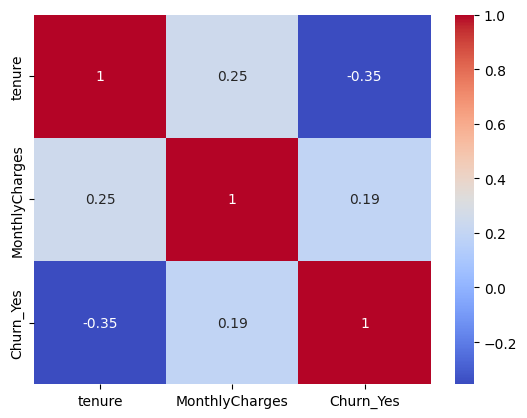

In [77]:
# Calculate and visualize the correlation matrix for 'tenure', 'MonthlyCharges', and 'Churn_Yes'
correlation = data[["tenure", "MonthlyCharges", "Churn_Yes"]].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")# Create a heatmap to show correlations
plt.show()
plt.show()

4.2 Chi-Square Test (Categorical Features)

In [78]:


# Identify the one-hot encoded categorical columns from X_domain
# These columns are already numerical (0/1) and do not need further encoding for chi2.
categorical_ohe_features = [
    'Contract_One year',
    'Contract_Two year',
    'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Electronic check',
    'PaymentMethod_Mailed check',
    'InternetService_Fiber optic',
    'InternetService_No'
]

X_cat = X_domain[categorical_ohe_features]

# Perform chi-square test
chi_scores, p_values = chi2(X_cat, y)

# Create a DataFrame to display the chi-square scores and p-values
chi_df = pd.DataFrame({
    "Feature": X_cat.columns,
    "Chi-Square Score": chi_scores,
    "p-value": p_values
})

print(chi_df.sort_values(by="Chi-Square Score", ascending=False))

                                 Feature  Chi-Square Score        p-value
1                      Contract_Two year        486.223101  9.454286e-108
3         PaymentMethod_Electronic check        424.113152   3.105849e-94
5            InternetService_Fiber optic        372.082851   6.587130e-83
6                     InternetService_No        285.475152   4.814000e-64
0                      Contract_One year        176.608724   2.666317e-40
2  PaymentMethod_Credit card (automatic)         99.972539   1.545248e-23
4             PaymentMethod_Mailed check         44.725143   2.267270e-11


/tmp/ipython-input-1443344396.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Chi-Square Score', y='Feature', data=chi_df.sort_values(by='Chi-Square Score', ascending=False), palette='viridis')


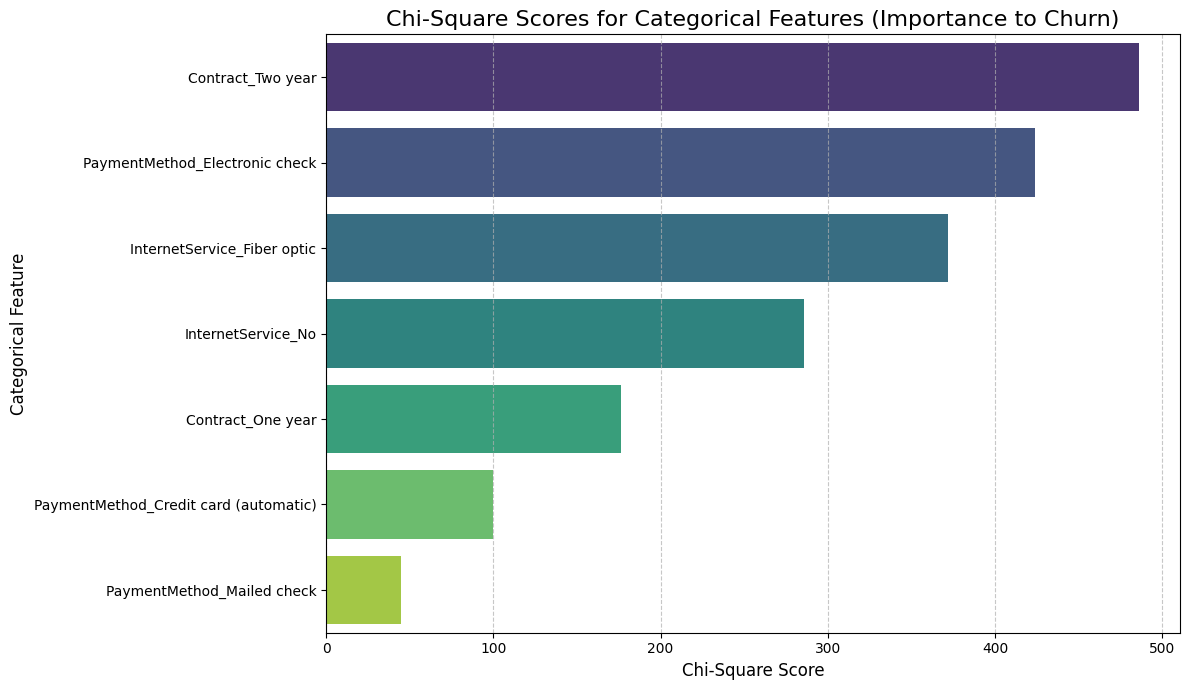

In [79]:
plt.figure(figsize=(12, 7))
sns.barplot(x='Chi-Square Score', y='Feature', data=chi_df.sort_values(by='Chi-Square Score', ascending=False), palette='viridis')
plt.title('Chi-Square Scores for Categorical Features (Importance to Churn)', fontsize=16)
plt.xlabel('Chi-Square Score', fontsize=12)
plt.ylabel('Categorical Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Step 5: Model-Based Feature Importance

In [80]:
# Initialize and train a RandomForestClassifier to get feature importances
rf = RandomForestClassifier(random_state=42)
rf.fit(X_domain.select_dtypes(include="number"), y)

importances = rf.feature_importances_# Get feature importances from the trained model

# Create a DataFrame to store feature importance scores
feature_importance = pd.DataFrame({
    "Feature": X_domain.select_dtypes(include="number").columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feature_importance)# Print the feature importance scores


          Feature  Importance
1  MonthlyCharges     0.67823
0          tenure     0.32177


Step 6: Final Selected Features

In [81]:
# Define the final list of selected features based on previous analysis
selected_features = [
    "tenure",
    "MonthlyCharges",
    "Contract_One year",
    "Contract_Two year",
    "PaymentMethod_Credit card (automatic)",
    "PaymentMethod_Electronic check",
    "PaymentMethod_Mailed check",
    "InternetService_Fiber optic",
    "InternetService_No"
]

X_selected = X[selected_features] # Create a new DataFrame with only the final selected features
print(X_selected)


        tenure  MonthlyCharges  Contract_One year  Contract_Two year  \
0    -1.280248       -1.161694              False              False   
1     0.064303       -0.260878               True              False   
2    -1.239504       -0.363923              False              False   
3     0.512486       -0.747850               True              False   
4    -1.239504        0.196178              False              False   
...        ...             ...                ...                ...   
7038 -0.343137        0.664868               True              False   
7039  1.612573        1.276493               True              False   
7040 -0.872808       -1.170004              False              False   
7041 -1.158016        0.319168              False              False   
7042  1.368109        1.357932              False               True   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                     False             

In [82]:
X = data.drop("Churn_Yes", axis=1) # Define features (X) by dropping the target variable
y = data["Churn_Yes"] # Define target variable (y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,# Allocate 20% of the data for testing
    random_state=42,# Set random state for reproducibility
    stratify=y # Ensure class distribution is preserved across splits
)

In [83]:
# Define a dictionary of machine learning models to be evaluated
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),# Logistic Regression model
    "Decision Tree": DecisionTreeClassifier(random_state=42), # Decision Tree Classifier
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42), # Random Forest Classifier
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)# Gradient Boosting Classifier
}


In [41]:
for name, model in models.items():
    model.fit(X_train, y_train) # Train each model on the training data
    y_pred = model.predict(X_test)# Make predictions on the test data
    acc = accuracy_score(y_test, y_pred) # Calculate accuracy score
    print(f"{name} Accuracy: {acc:.4f}")# Print the accuracy for each model


Logistic Regression Accuracy: 0.8031
Decision Tree Accuracy: 0.7448
Random Forest Accuracy: 0.7946
Gradient Boosting Accuracy: 0.7946


In [42]:
X_numeric = X.astype(int) # Convert all columns in X to integer type for Random Forest compatibility

# Instantiate and train a RandomForestClassifier model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_numeric, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    "Feature": X_numeric.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("Model-Based Feature Importance (Random Forest):")
print(feature_importance.head(10)) # Display top 10 features


Model-Based Feature Importance (Random Forest):
                             Feature  Importance
1                             tenure    0.054793
7041     InternetService_Fiber optic    0.031178
7059  PaymentMethod_Electronic check    0.027706
7044              OnlineSecurity_Yes    0.027211
7050                 TechSupport_Yes    0.025261
7055               Contract_One year    0.023396
7056               Contract_Two year    0.022220
7035                     gender_Male    0.021565
7057            PaperlessBilling_Yes    0.021561
7046                OnlineBackup_Yes    0.019427


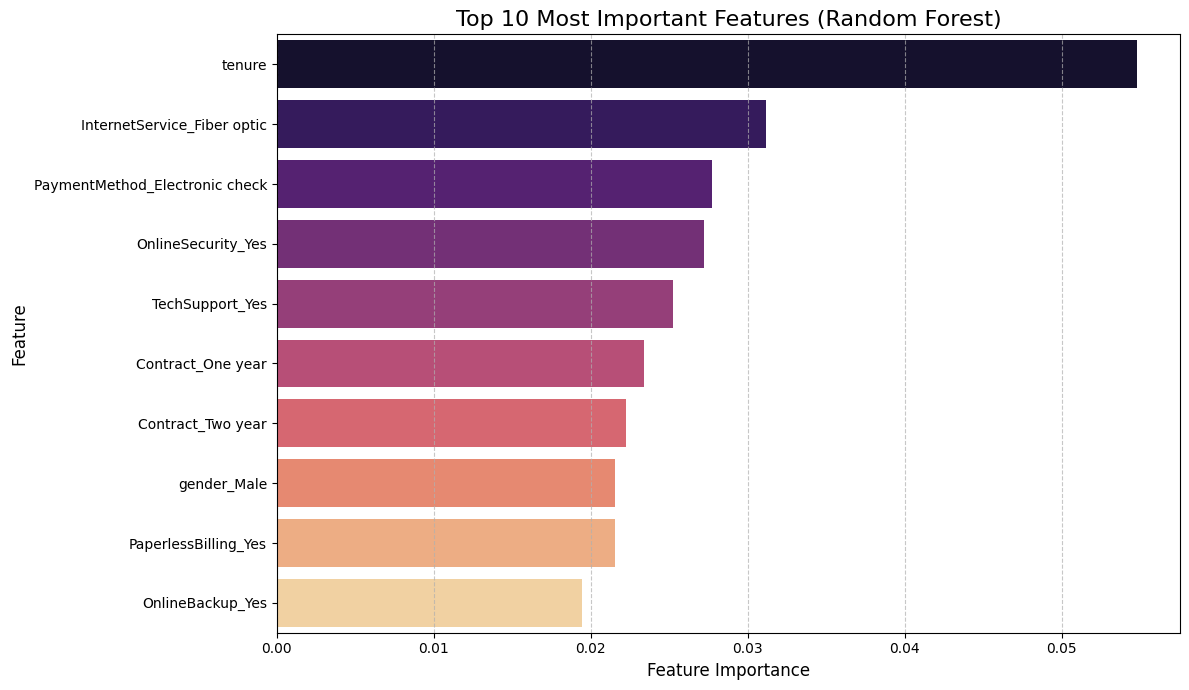

In [43]:
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='magma', hue='Feature', legend=False)
plt.title('Top 10 Most Important Features (Random Forest)', fontsize=16)
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [44]:
data["Churn_Yes"] = data["Churn_Yes"].astype(int) # Convert the 'Churn_Yes' column to integer type (0 or 1)

In [45]:
X = data.drop("Churn_Yes", axis=1)   # Define input features by dropping the target variable
y = data["Churn_Yes"]                 # Define the target variable


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
model = LogisticRegression(max_iter=1000)# Instantiate Logistic Regression model
model.fit(X_train, y_train)# Train the Logistic Regression model on the training data


LogisticRegression(max_iter=1000)

In [46]:
y_pred = model.predict(X_test) # Make predictions on the test set
accuracy = accuracy_score(y_test, y_pred)# Calculate the accuracy of the model
print("Model Accuracy:", accuracy)# Print the calculated accuracy


Model Accuracy: 0.8031272210376688


In [47]:

data_model = DecisionTreeClassifier(random_state=42) # Instantiate a Decision Tree Classifier
data_model.fit(X_train, y_train) # Train the Decision Tree model on the training data


DecisionTreeClassifier(random_state=42)

In [48]:
y_pred = model.predict(X_test) # Get class predictions from the model
y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (churn) for ROC-AUC

In [49]:
accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy
precision = precision_score(y_test, y_pred)# Calculate precision
recall = recall_score(y_test, y_pred) # Calculate recall
f1 = f1_score(y_test, y_pred) # Calculate F1-score
roc_auc = roc_auc_score(y_test, y_prob)# Calculate ROC-AUC score

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1-score :", f1)
print("ROC-AUC  :", roc_auc)


Accuracy : 0.8031272210376688
Precision: 0.6483180428134556
Recall   : 0.5668449197860963
F1-score : 0.6048502139800286
ROC-AUC  : 0.8360688198539119


In [50]:
 # Print a detailed classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [51]:
# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))


[[918 115]
 [162 212]]
